All relevant libraries are imported 

In [93]:
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import mannwhitneyu
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from pandas.plotting import table
from matplotlib.table import Table
from scipy.stats import ttest_ind
from scipy.stats import zscore
from scipy.stats import skew, kurtosis, levene
from factor_analyzer import FactorAnalyzer
from scipy.stats import spearmanr

Data is loaded

In [94]:
file_path = r'C:\Academic\Erasmus Rotterdam School of Management\MSc Management of Innovation\Thesis\Data\Emmanuel Huygens_May 27, 2024_20.09.csv'

data = pd.read_csv(file_path)

Viewing RAW database

In [95]:
data.tail()


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q12A_1,Q13B_1,Q14B_1,Q15B_1,Q16B_1,Q17B_1,Q18B_1,Q19B_1,Q20B_1,QX
220,2024-05-24 15:01:46,2024-05-24 15:05:06,0,145.5.180.16,100,199,1,2024-05-24 15:05:07,R_8hYKLUAhXgzyvHX,NaN,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,2024-05-24 15:01:49,2024-05-24 15:05:40,0,145.5.180.29,100,230,1,2024-05-24 15:05:40,R_8NanSJqriARhIzV,NaN,...,NaN,7,8,8,8,5,6,8,5,703204rb@eur.nl
222,2024-05-24 15:01:47,2024-05-24 15:06:17,0,84.241.201.229,100,270,1,2024-05-24 15:06:18,R_2L26mIo85z0seue,NaN,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Florisv03@gmail.com
223,2024-05-17 18:00:50,2024-05-17 18:01:40,0,213.194.44.30,59,50,0,2024-05-24 18:01:42,R_82K2nlAmnNETdwB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,2024-05-18 10:29:08,2024-05-19 15:26:35,0,80.57.173.101,4,104246,0,2024-05-26 15:26:40,R_8u4ZmzSzwfZ7Frr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Removing Metadata and unnecessary columns

In [96]:
columns_to_remove = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)',
                     'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName',
                     'RecipientEmail', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel',
                     'UserLanguage', 'Q_RelevantIDDuplicate', 'Q_RelevantIDDuplicateScore', 'Q_RelevantIDFraudScore',
                     'Q_RelevantIDLastStartDate', 'ExternalReference', 'Q_BallotBoxStuffing']


data_cleaned = data.drop(columns=columns_to_remove)


data_cleaned.tail()

,Finished,Introduction,Q1,Q2,Q3_1,Q4_1,Q5A_1,Q6A_1,Q7A_1,Q8A_1,...,Q12A_1,Q13B_1,Q14B_1,Q15B_1,Q16B_1,Q17B_1,Q18B_1,Q19B_1,Q20B_1,QX
220,1,1,2,2,7,9,7,6,5,3,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,1,1,2,2,6,8,NaN,NaN,NaN,NaN,...,NaN,7,8,8,8,5,6,8,5,703204rb@eur.nl
222,1,1,2,2,8,8,8,5,4,3,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Florisv03@gmail.com
223,0,1,3,2,8,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Excluding non-complete responses

In [97]:
data_cleaned['Finished'] = pd.to_numeric(data_cleaned['Finished'], errors='coerce')

data_filtered = data_cleaned[data_cleaned['Finished'] == 1]

print(f"Number of completed responses: {data_filtered.shape[0]}")



Number of completed responses: 172


Ensuring data is treated as Ordinal

In [98]:
ordinal_columns = ['Q1', 'Q2', 'Q3_1', 'Q4_1', 'Q5A_1', 'Q6A_1', 'Q7A_1', 'Q8A_1', 
                   'Q9A_1', 'Q10A_1', 'Q11A_1', 'Q12A_1', 'Q13B_1', 'Q14B_1', 
                   'Q15B_1', 'Q16B_1', 'Q17B_1', 'Q18B_1', 'Q19B_1', 'Q20B_1']

data_filtered_copy = data_filtered.copy()

for col in ordinal_columns:
    data_filtered_copy[col] = data_filtered_copy[col].astype(str)  
    data_filtered_copy[col] = pd.Categorical(data_filtered_copy[col], categories=map(str, range(11)), ordered=True) 

print(data_filtered_copy.dtypes)

print(data_filtered_copy[ordinal_columns].head())

data_filtered = data_filtered_copy

Finished         float64
Introduction      object
Q1              category
Q2              category
Q3_1            category
Q4_1            category
Q5A_1           category
Q6A_1           category
Q7A_1           category
Q8A_1           category
Q9A_1           category
Q10A_1          category
Q11A_1          category
Q12A_1          category
Q13B_1          category
Q14B_1          category
Q15B_1          category
Q16B_1          category
Q17B_1          category
Q18B_1          category
Q19B_1          category
Q20B_1          category
QX                object
dtype: object
  Q1 Q2 Q3_1 Q4_1 Q5A_1 Q6A_1 Q7A_1 Q8A_1 Q9A_1 Q10A_1 Q11A_1 Q12A_1 Q13B_1  \
2  3  2    6    4     6     3     4     4     5      6      9      8    NaN   
3  2  3    8    6   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   
4  2  3    6    6     6     6     3     5     5      4      6      8    NaN   
5  3  2    7    6   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN      8   
6  4  3    5    

Creating a Dummy Variable for Treatment (0 is Control group, 1 is Test group)

In [99]:
control_columns = ['Q5A_1', 'Q6A_1', 'Q7A_1', 'Q8A_1', 'Q9A_1', 'Q10A_1', 'Q11A_1', 'Q12A_1']
test_columns = ['Q13B_1', 'Q14B_1', 'Q15B_1', 'Q16B_1', 'Q17B_1', 'Q18B_1', 'Q19B_1', 'Q20B_1']

data_filtered_copy['Treatment'] = 0
data_filtered_copy.loc[data_filtered_copy[test_columns].notnull().any(axis=1), 'Treatment'] = 1

print(data_filtered_copy.dtypes)
print(data_filtered_copy.head())
print(data_filtered_copy.tail())

data_filtered = data_filtered_copy

Finished         float64
Introduction      object
Q1              category
Q2              category
Q3_1            category
Q4_1            category
Q5A_1           category
Q6A_1           category
Q7A_1           category
Q8A_1           category
Q9A_1           category
Q10A_1          category
Q11A_1          category
Q12A_1          category
Q13B_1          category
Q14B_1          category
Q15B_1          category
Q16B_1          category
Q17B_1          category
Q18B_1          category
Q19B_1          category
Q20B_1          category
QX                object
Treatment          int64
dtype: object
   Finished Introduction Q1 Q2 Q3_1 Q4_1 Q5A_1 Q6A_1 Q7A_1 Q8A_1  ... Q13B_1  \
2       1.0            1  3  2    6    4     6     3     4     4  ...    NaN   
3       1.0            1  2  3    8    6   NaN   NaN   NaN   NaN  ...    NaN   
4       1.0            1  2  3    6    6     6     6     3     5  ...    NaN   
5       1.0            1  3  2    7    6   NaN   NaN   NaN   NaN  

Merging Control and Test datasets into a single dataset (Merging respective questions)

In [100]:
control_columns = ['Q5A_1', 'Q6A_1', 'Q7A_1', 'Q8A_1', 'Q9A_1', 'Q10A_1', 'Q11A_1', 'Q12A_1']
test_columns = ['Q13B_1', 'Q14B_1', 'Q15B_1', 'Q16B_1', 'Q17B_1', 'Q18B_1', 'Q19B_1', 'Q20B_1']

for control_col, test_col in zip(control_columns, test_columns):
    new_col = control_col.replace('A', '')  
    data_filtered[new_col] = data_filtered[control_col].combine_first(data_filtered[test_col])

data_filtered.drop(columns=control_columns + test_columns, inplace=True)

print(data_filtered.dtypes)
print(data_filtered.head())
print(data_filtered.tail())
data_filtered.head()


Finished         float64
Introduction      object
Q1              category
Q2              category
Q3_1            category
Q4_1            category
QX                object
Treatment          int64
Q5_1            category
Q6_1            category
Q7_1            category
Q8_1            category
Q9_1            category
Q10_1           category
Q11_1           category
Q12_1           category
dtype: object
   Finished Introduction Q1 Q2 Q3_1 Q4_1   QX  Treatment Q5_1 Q6_1 Q7_1 Q8_1  \
2       1.0            1  3  2    6    4  NaN          0    6    3    4    4   
3       1.0            1  2  3    8    6  NaN          0  NaN  NaN  NaN  NaN   
4       1.0            1  2  3    6    6  NaN          0    6    6    3    5   
5       1.0            1  3  2    7    6  NaN          1    8    6    8    7   
6       1.0            1  4  3    5    8  NaN          1    8    9    7    9   

  Q9_1 Q10_1 Q11_1 Q12_1  
2    5     6     9     8  
3  NaN   NaN   NaN   NaN  
4    5     4     6     8

,Finished,Introduction,Q1,Q2,Q3_1,Q4_1,QX,Treatment,Q5_1,Q6_1,Q7_1,Q8_1,Q9_1,Q10_1,Q11_1,Q12_1
2,1.0,1,3,2,6,4,NaN,0,6,3,4,4,5,6,9,8
3,1.0,1,2,3,8,6,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1,2,3,6,6,NaN,0,6,6,3,5,5,4,6,8
5,1.0,1,3,2,7,6,NaN,1,8,6,8,7,6,10,4,6
6,1.0,1,4,3,5,8,NaN,1,8,9,7,9,7,9,5,6


Verifying if Dummy Treatment correctly distinguishes between control and test groups in the new merged dataset.

In [101]:
print("Unique values in 'Treatment' column:", data_filtered['Treatment'].unique())

for col in ['Q5_1', 'Q6_1', 'Q7_1', 'Q8_1', 'Q9_1', 'Q10_1', 'Q11_1', 'Q12_1']:
    print(f"Column: {col}, Number of non-null values: {data_filtered[col].notnull().sum()}")

print(data_filtered[['Q5_1', 'Q6_1', 'Q7_1', 'Q8_1', 'Q9_1', 'Q10_1', 'Q11_1', 'Q12_1', 'Treatment']].head())
print(data_filtered[['Q5_1', 'Q6_1', 'Q7_1', 'Q8_1', 'Q9_1', 'Q10_1', 'Q11_1', 'Q12_1', 'Treatment']].tail())


Unique values in 'Treatment' column: [0 1]
Column: Q5_1, Number of non-null values: 171
Column: Q6_1, Number of non-null values: 171
Column: Q7_1, Number of non-null values: 171
Column: Q8_1, Number of non-null values: 171
Column: Q9_1, Number of non-null values: 171
Column: Q10_1, Number of non-null values: 171
Column: Q11_1, Number of non-null values: 171
Column: Q12_1, Number of non-null values: 171
  Q5_1 Q6_1 Q7_1 Q8_1 Q9_1 Q10_1 Q11_1 Q12_1  Treatment
2    6    3    4    4    5     6     9     8          0
3  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN          0
4    6    6    3    5    5     4     6     8          0
5    8    6    8    7    6    10     4     6          1
6    8    9    7    9    7     9     5     6          1
    Q5_1 Q6_1 Q7_1 Q8_1 Q9_1 Q10_1 Q11_1 Q12_1  Treatment
218    7    5    8    5    3     4     9     5          0
219    8    7    6    3    6     5     5     4          1
220    7    6    5    3    6     7     8     4          0
221    7    8    8    8   

Handling remaining missing values

In [102]:
print(f"Number of rows: {len(data_filtered)}")

merged_columns = ['Q5_1', 'Q6_1', 'Q7_1', 'Q8_1', 'Q9_1', 'Q10_1', 'Q11_1', 'Q12_1']

data_filtered = data_filtered.dropna(subset=merged_columns)

print(f"Number of rows: {len(data_filtered)}")
print(data_filtered.dtypes)
print(data_filtered.tail())

Number of rows: 172
Number of rows: 171
Finished         float64
Introduction      object
Q1              category
Q2              category
Q3_1            category
Q4_1            category
QX                object
Treatment          int64
Q5_1            category
Q6_1            category
Q7_1            category
Q8_1            category
Q9_1            category
Q10_1           category
Q11_1           category
Q12_1           category
dtype: object
     Finished Introduction Q1 Q2 Q3_1 Q4_1                   QX  Treatment  \
218       1.0            1  2  1    7    6      702929bp@eur.nl          0   
219       1.0            1  2  2    5    3                  NaN          1   
220       1.0            1  2  2    7    9                  NaN          0   
221       1.0            1  2  2    6    8      703204rb@eur.nl          1   
222       1.0            1  2  2    8    8  Florisv03@gmail.com          0   

    Q5_1 Q6_1 Q7_1 Q8_1 Q9_1 Q10_1 Q11_1 Q12_1  
218    7    5    8    5    3

Dropping leftover columns

In [103]:
columns_to_drop = ['Finished', 'Introduction', 'QX']
data_filtered = data_filtered.drop(columns=columns_to_drop)

Renaming columns and converting IV

In [104]:
data_filtered.rename(columns={
    'Q1': 'Age',
    'Q2': 'Education',
    'Q3_1': 'Confidence',
    'Q4_1': 'Proficiency',
    'Q5_1': 'FirmTrust',
    'Q6_1': 'FirmEnforcability',
    'Q7_1': 'FirmInformation',
    'Q8_1': 'FirmOpportunism',
    'Q9_1': 'MarketTrust',
    'Q10_1': 'MarketEnforcability',
    'Q11_1': 'MarketInformation',
    'Q12_1': 'MarketOpportunism',
    'Treatment': 'SmartContract'
}, inplace=True)

data_filtered['SmartContract'] = data_filtered['SmartContract'].astype(int)


Factor analysis and Eigenvalues for Constructs

In [105]:
firm_data = data_filtered[['FirmTrust', 'FirmEnforcability', 'FirmInformation', 'FirmOpportunism']]
market_data = data_filtered[['MarketTrust', 'MarketEnforcability', 'MarketInformation', 'MarketOpportunism']]

firm_corr = firm_data.corr(method='spearman')

market_corr = market_data.corr(method='spearman')

fa_firm = FactorAnalyzer(n_factors=1, rotation=None)
fa_firm.fit(firm_corr)

fa_market = FactorAnalyzer(n_factors=1, rotation=None)
fa_market.fit(market_corr)

eigenvalues_firm, vectors_firm = fa_firm.get_eigenvalues()
loadings_firm = fa_firm.loadings_

eigenvalues_market, vectors_market = fa_market.get_eigenvalues()
loadings_market = fa_market.loadings_

print(f"FirmHoldUp Eigenvalues: {eigenvalues_firm}")
print(f"FirmHoldUp Factor Loadings:\n{loadings_firm}")
print(f"MarketHoldUp Eigenvalues: {eigenvalues_market}")
print(f"MarketHoldUp Factor Loadings:\n{loadings_market}")


FirmHoldUp Eigenvalues: [3.44124007e+00 3.86167480e-01 1.72592445e-01 2.08130729e-16]
FirmHoldUp Factor Loadings:
[[-0.92133908]
 [-0.79136624]
 [ 0.98159175]
 [ 0.91376933]]
MarketHoldUp Eigenvalues: [3.62919826e+00 2.29276845e-01 1.41524893e-01 2.65247498e-16]
MarketHoldUp Factor Loadings:
[[-0.94648779]
 [-0.89798187]
 [ 0.94673216]
 [ 0.95343368]]


Creating the composite scores for the DVs based on their factor loadings and min-maxing the scale

In [106]:
firm_data = data_filtered[['FirmTrust', 'FirmEnforcability', 'FirmInformation', 'FirmOpportunism']]
market_data = data_filtered[['MarketTrust', 'MarketEnforcability', 'MarketInformation', 'MarketOpportunism']]

firm_data_numeric = firm_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
market_data_numeric = market_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

firm_trust_loading = -0.92133908
firm_enforcability_loading = -0.79136624
firm_information_loading = 0.98159175
firm_opportunism_loading = 0.91376933

market_trust_loading = -0.94648779
market_enforcability_loading = -0.89798187
market_information_loading = 0.94673216
market_opportunism_loading = 0.95343368

data_filtered['FirmHoldup'] = (
    firm_data_numeric['FirmTrust'] * firm_trust_loading +
    firm_data_numeric['FirmEnforcability'] * firm_enforcability_loading +
    firm_data_numeric['FirmInformation'] * firm_information_loading +
    firm_data_numeric['FirmOpportunism'] * firm_opportunism_loading
)

data_filtered['MarketHoldup'] = (
    market_data_numeric['MarketTrust'] * market_trust_loading +
    market_data_numeric['MarketEnforcability'] * market_enforcability_loading +
    market_data_numeric['MarketInformation'] * market_information_loading +
    market_data_numeric['MarketOpportunism'] * market_opportunism_loading
)

print(data_filtered[['FirmHoldup', 'MarketHoldup']].head())


# This part of the code is the min-max scaling so that the DVs have a range of 0-10
data_filtered['FirmHoldup'] = 10 * (data_filtered['FirmHoldup'] - data_filtered['FirmHoldup'].min()) / (data_filtered['FirmHoldup'].max() - data_filtered['FirmHoldup'].min())
data_filtered['MarketHoldup'] = 10 * (data_filtered['MarketHoldup'] - data_filtered['MarketHoldup'].min()) / (data_filtered['MarketHoldup'].max() - data_filtered['MarketHoldup'].min())

print(data_filtered[['FirmHoldup', 'MarketHoldup']].head())

print("Data Types:\n", data_filtered.dtypes)




   FirmHoldup  MarketHoldup
2   -0.320689      6.027729
4   -2.762610      4.983496
5    2.130209     -5.151215
6    0.602057     -4.252988
7    1.095935      6.821508
   FirmHoldup  MarketHoldup
2    5.023205      6.891192
4    4.024075      6.572393
5    6.026007      3.478319
6    5.400753      3.752543
7    5.602826      7.133529
Data Types:
 Age                    category
Education              category
Confidence             category
Proficiency            category
SmartContract             int32
FirmTrust              category
FirmEnforcability      category
FirmInformation        category
FirmOpportunism        category
MarketTrust            category
MarketEnforcability    category
MarketInformation      category
MarketOpportunism      category
FirmHoldup              float64
MarketHoldup            float64
dtype: object


Identifying extreme outliers for DVs - Start of normality assumption check

In [107]:
data_filtered['FirmHoldup_z'] = zscore(data_filtered['FirmHoldup'])
data_filtered['MarketHoldup_z'] = zscore(data_filtered['MarketHoldup'])

firm_outliers = data_filtered[(data_filtered['FirmHoldup_z'] > 3) | (data_filtered['FirmHoldup_z'] < -3)]
market_outliers = data_filtered[(data_filtered['MarketHoldup_z'] > 3) | (data_filtered['MarketHoldup_z'] < -3)]

print(f"FirmHoldup outliers: {firm_outliers.shape[0]}")
print(f"MarketHoldup outliers: {market_outliers.shape[0]}")

FirmHoldup outliers: 1
MarketHoldup outliers: 1


Removing extreme outliers for DVs (+-z score of 3)

In [108]:
data_filtered = data_filtered[(data_filtered['FirmHoldup_z'] <= 3) & (data_filtered['FirmHoldup_z'] >= -3)]
data_filtered = data_filtered[(data_filtered['MarketHoldup_z'] <= 3) & (data_filtered['MarketHoldup_z'] >= -3)]

data_filtered.drop(columns=['FirmHoldup_z', 'MarketHoldup_z'], inplace=True)

Calculating Skewness and Kurtosis of DVs

Skewness:
FirmHoldup     -0.296398
MarketHoldup    0.034605
dtype: float64

Kurtosis:
FirmHoldup     -0.584110
MarketHoldup    0.315906
dtype: float64


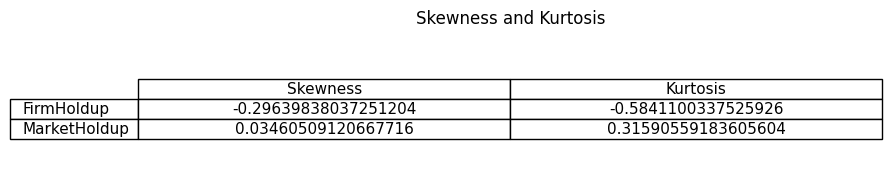

In [109]:
skewness = data_filtered[['FirmHoldup', 'MarketHoldup']].skew()
kurtosis = data_filtered[['FirmHoldup', 'MarketHoldup']].kurtosis()

results = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

fig, ax = plt.subplots(figsize=(8, 2))  
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results.values, colLabels=results.columns, rowLabels=results.index, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.2) 

print("Skewness:")
print(data_filtered[['FirmHoldup', 'MarketHoldup']].skew())

print("\nKurtosis:")
print(data_filtered[['FirmHoldup', 'MarketHoldup']].kurtosis())

plt.title('Skewness and Kurtosis')
plt.show()

Plotting QQ Plots for DVs

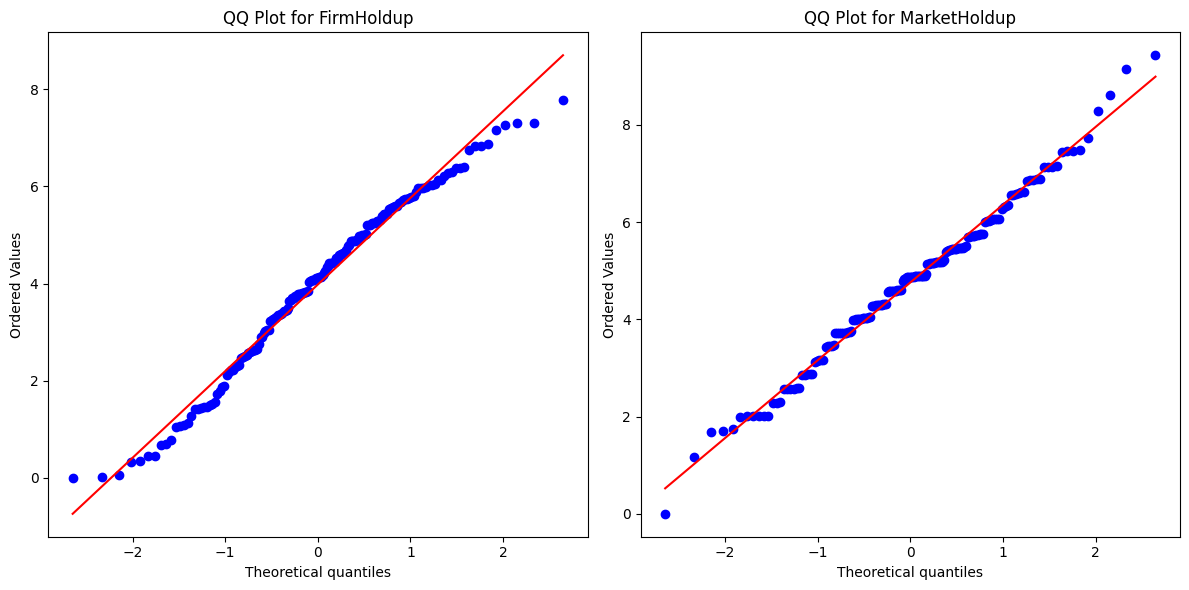

In [110]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(data_filtered['FirmHoldup'], dist="norm", plot=plt)
plt.title('QQ Plot for FirmHoldup')

plt.subplot(1, 2, 2)
stats.probplot(data_filtered['MarketHoldup'], dist="norm", plot=plt)
plt.title('QQ Plot for MarketHoldup')

plt.tight_layout()
plt.show()

Testing for Normality of DVs - End of normality assumption check

Shapiro-Wilk Test for FirmHoldup: Statistic=0.9804220199584961, p-value=0.016823070123791695
Shapiro-Wilk Test for MarketHoldup: Statistic=0.992710530757904, p-value=0.5517644882202148
Kolmogorov-Smirnov Test for FirmHoldup: Statistic=0.056988041324416705, p-value=0.6180894362805343
Kolmogorov-Smirnov Test for MarketHoldup: Statistic=0.051949948594089856, p-value=0.7284242757691066


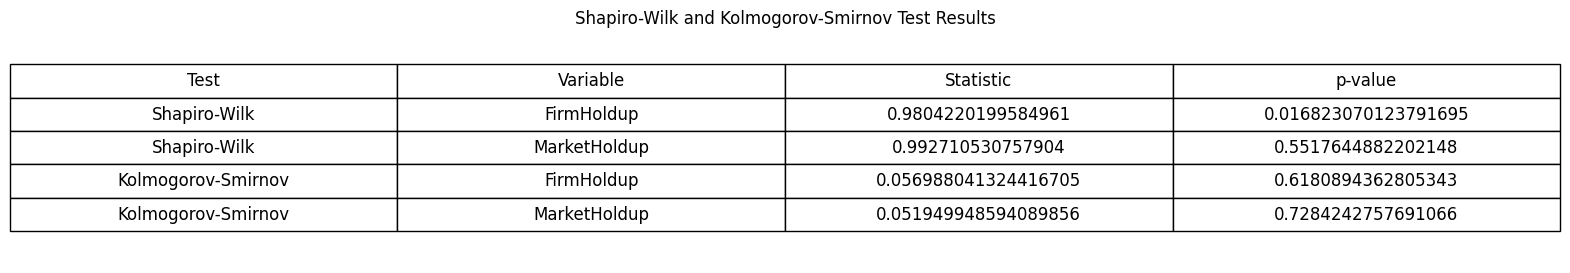

In [111]:
shapiro_firm = stats.shapiro(data_filtered['FirmHoldup'])
shapiro_market = stats.shapiro(data_filtered['MarketHoldup'])
print(f'Shapiro-Wilk Test for FirmHoldup: Statistic={shapiro_firm.statistic}, p-value={shapiro_firm.pvalue}')
print(f'Shapiro-Wilk Test for MarketHoldup: Statistic={shapiro_market.statistic}, p-value={shapiro_market.pvalue}')

ks_firm = stats.kstest(data_filtered['FirmHoldup'], 'norm', args=(data_filtered['FirmHoldup'].mean(), data_filtered['FirmHoldup'].std()))
ks_market = stats.kstest(data_filtered['MarketHoldup'], 'norm', args=(data_filtered['MarketHoldup'].mean(), data_filtered['MarketHoldup'].std()))
print(f'Kolmogorov-Smirnov Test for FirmHoldup: Statistic={ks_firm.statistic}, p-value={ks_firm.pvalue}')
print(f'Kolmogorov-Smirnov Test for MarketHoldup: Statistic={ks_market.statistic}, p-value={ks_market.pvalue}')

normalitytest_results = pd.DataFrame({
    'Test': ['Shapiro-Wilk', 'Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Kolmogorov-Smirnov'],
    'Variable': ['FirmHoldup', 'MarketHoldup', 'FirmHoldup', 'MarketHoldup'],
    'Statistic': [shapiro_firm.statistic, shapiro_market.statistic, ks_firm.statistic, ks_market.statistic],
    'p-value': [shapiro_firm.pvalue, shapiro_market.pvalue, ks_firm.pvalue, ks_market.pvalue]
})

fig, ax = plt.subplots(figsize=(10, 3)) 
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=normalitytest_results.values, colLabels=normalitytest_results.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2, 2) 

plt.title('Shapiro-Wilk and Kolmogorov-Smirnov Test Results')
plt.show()

Final check-up of data clean and feature engineering

In [112]:
print("Data Types:\n", data_filtered.dtypes)

print("\nFirst few rows:\n", data_filtered.head())

print("\nLast few rows:\n", data_filtered.tail())

print("\nDescriptive statistics for categorical columns:\n", data_filtered.describe(include=['category']))



Data Types:
 Age                    category
Education              category
Confidence             category
Proficiency            category
SmartContract             int32
FirmTrust              category
FirmEnforcability      category
FirmInformation        category
FirmOpportunism        category
MarketTrust            category
MarketEnforcability    category
MarketInformation      category
MarketOpportunism      category
FirmHoldup              float64
MarketHoldup            float64
dtype: object

First few rows:
   Age Education Confidence Proficiency  SmartContract FirmTrust  \
2   3         2          6           4              0         6   
4   2         3          6           6              0         6   
5   3         2          7           6              1         8   
6   4         3          5           8              1         8   
7   3         2          7           6              0         6   

  FirmEnforcability FirmInformation FirmOpportunism MarketTrust  \
2    

Running Descriptive Statistics

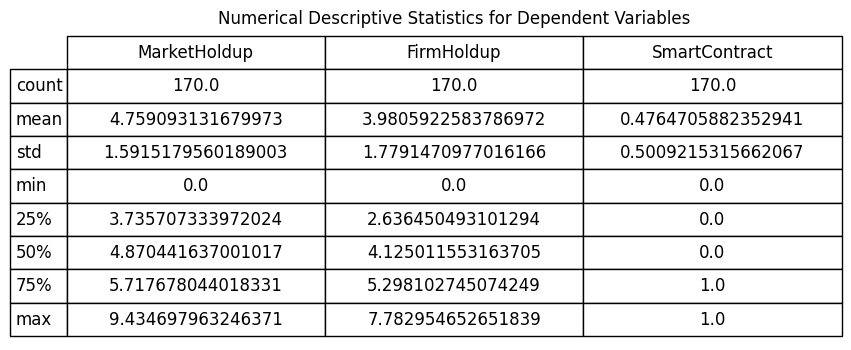

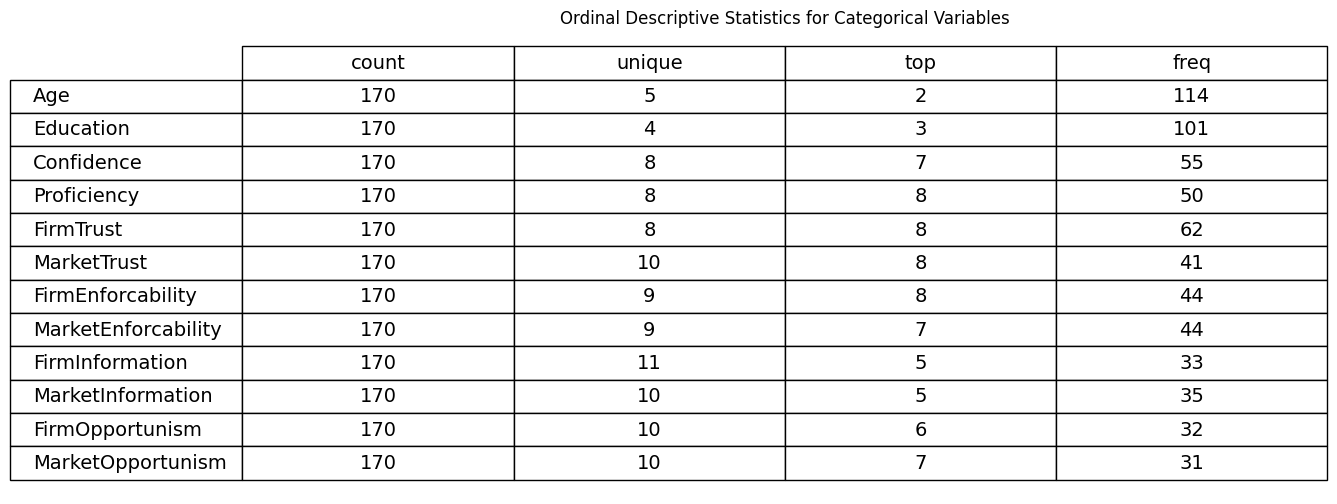

In [113]:
num_desc_stats = data_filtered[['MarketHoldup', 'FirmHoldup', 'SmartContract']].describe()

categorical_columns = [
    'Age', 'Education',
    'Confidence', 'Proficiency',
    'FirmTrust', 'MarketTrust',
    'FirmEnforcability', 'MarketEnforcability',
    'FirmInformation', 'MarketInformation',
    'FirmOpportunism', 'MarketOpportunism', 
]
ord_desc_stats = data_filtered[categorical_columns].describe(include=['category'])

fig, ax = plt.subplots(figsize=(10, 4))  
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=num_desc_stats.values, colLabels=num_desc_stats.columns, rowLabels=num_desc_stats.index, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.title('Numerical Descriptive Statistics for Dependent Variables')
plt.show()

ord_desc_stats_transposed = ord_desc_stats.transpose()

fig, ax = plt.subplots(figsize=(14, 6))  
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=ord_desc_stats_transposed.values, colLabels=ord_desc_stats_transposed.columns, rowLabels=ord_desc_stats_transposed.index, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2)
plt.title('Ordinal Descriptive Statistics for Categorical Variables')
plt.show()



Running Comparative Analysis of DVs' Descriptives

In [114]:
from scipy.stats import skew, kurtosis
#I had to include this library import in this cell explicitly because something seemingly went wrong with the kernel and the imports from the first cell didn't apply here accurately.
dependent_vars = ['MarketHoldup', 'FirmHoldup', ]

control_group = data_filtered[data_filtered['SmartContract'] == 0]
treatment_group = data_filtered[data_filtered['SmartContract'] == 1]

def calculate_stats(group):
    stats = {}
    for var in dependent_vars:
        stats[var] = {
            'Mean': group[var].mean(),
            'SD': group[var].std(),
            'Min': group[var].min(),
            'Max': group[var].max(),
            'N': group[var].count(),
            'Skewness': skew(group[var]),
            'Kurtosis': kurtosis(group[var])
        }
    return pd.DataFrame(stats)

control_stats_df = calculate_stats(control_group)

treatment_stats_df = calculate_stats(treatment_group)

combined_stats_df = pd.concat([control_stats_df, treatment_stats_df], axis=1, keys=['Control', 'Treatment'])

print(combined_stats_df)



              Control               Treatment           
         MarketHoldup FirmHoldup MarketHoldup FirmHoldup
Mean         5.097108   4.053704     4.387695   3.900260
SD           1.539891   1.707651     1.573421   1.861900
Min          1.164313   0.000000     0.000000   0.323793
Max          9.145740   7.156924     9.434698   7.782955
N           89.000000  89.000000    81.000000  81.000000
Skewness    -0.004744  -0.452342     0.111704  -0.138580
Kurtosis     0.152377  -0.439355     0.568069  -0.727799


Calculating Median and IQR for Ordinal Variables

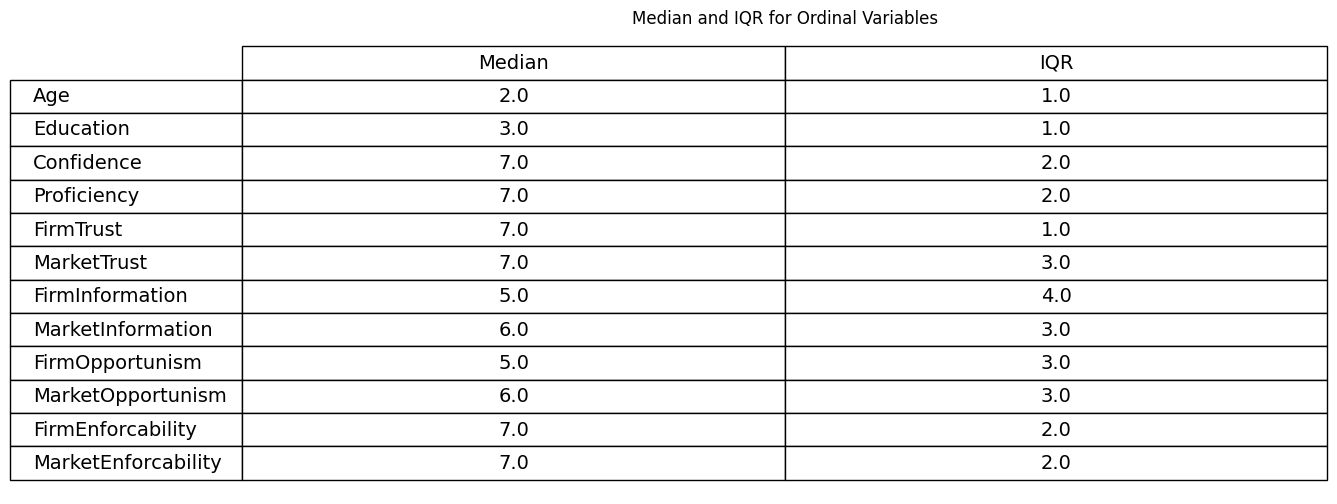

                     Median  IQR
Age                     2.0  1.0
Education               3.0  1.0
Confidence              7.0  2.0
Proficiency             7.0  2.0
FirmTrust               7.0  1.0
MarketTrust             7.0  3.0
FirmInformation         5.0  4.0
MarketInformation       6.0  3.0
FirmOpportunism         5.0  3.0
MarketOpportunism       6.0  3.0
FirmEnforcability       7.0  2.0
MarketEnforcability     7.0  2.0
Data types after removal:
 Age                    category
Education              category
Confidence             category
Proficiency            category
SmartContract             int32
FirmTrust              category
FirmEnforcability      category
FirmInformation        category
FirmOpportunism        category
MarketTrust            category
MarketEnforcability    category
MarketInformation      category
MarketOpportunism      category
FirmHoldup              float64
MarketHoldup            float64
dtype: object

Number of rows:  170


In [115]:
ordinal_columns = [
    'Age', 'Education', 'Confidence', 'Proficiency', 'FirmTrust', 'MarketTrust', 'FirmInformation', 'MarketInformation', 
    'FirmOpportunism', 'MarketOpportunism', 'FirmEnforcability', 'MarketEnforcability'
]

median_iqr_data = {}
for col in ordinal_columns:
    data_filtered[col + '_code'] = data_filtered[col].cat.codes
    median_iqr_data[col] = {
        'Median': data_filtered[col + '_code'].median(),
        'IQR': data_filtered[col + '_code'].quantile(0.75) - data_filtered[col + '_code'].quantile(0.25)
    }

median_iqr_df = pd.DataFrame(median_iqr_data).T

fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=median_iqr_df.values, colLabels=median_iqr_df.columns, rowLabels=median_iqr_df.index, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2)
plt.title('Median and IQR for Ordinal Variables')
plt.show()

print(median_iqr_df)

data_filtered.drop(columns=[col + '_code' for col in ordinal_columns], inplace=True)

print("Data types after removal:\n", data_filtered.dtypes)
print("\nNumber of rows: ", data_filtered.shape[0])

Running Comparative Analysis of IQR and Median

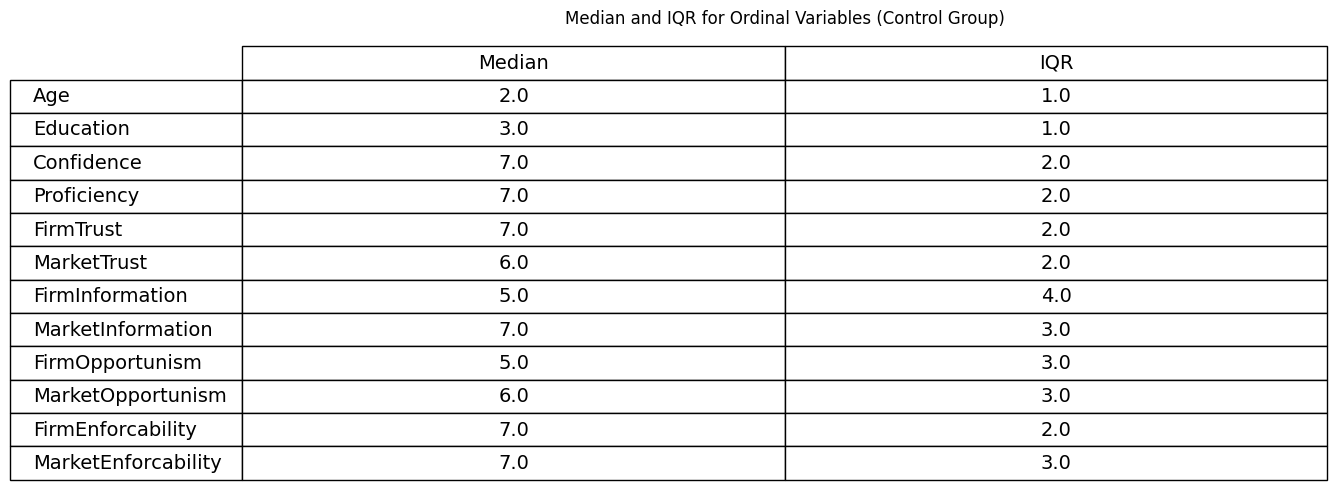

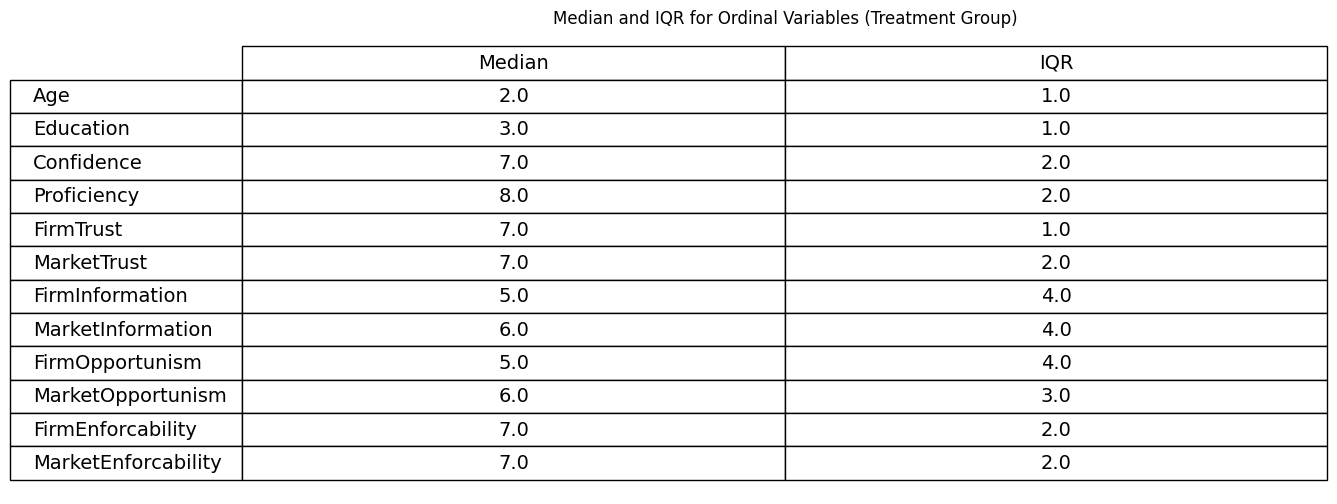

Control Group:
                      Median  IQR
Age                     2.0  1.0
Education               3.0  1.0
Confidence              7.0  2.0
Proficiency             7.0  2.0
FirmTrust               7.0  2.0
MarketTrust             6.0  2.0
FirmInformation         5.0  4.0
MarketInformation       7.0  3.0
FirmOpportunism         5.0  3.0
MarketOpportunism       6.0  3.0
FirmEnforcability       7.0  2.0
MarketEnforcability     7.0  3.0

Treatment Group:
                      Median  IQR
Age                     2.0  1.0
Education               3.0  1.0
Confidence              7.0  2.0
Proficiency             8.0  2.0
FirmTrust               7.0  1.0
MarketTrust             7.0  2.0
FirmInformation         5.0  4.0
MarketInformation       6.0  4.0
FirmOpportunism         5.0  4.0
MarketOpportunism       6.0  3.0
FirmEnforcability       7.0  2.0
MarketEnforcability     7.0  2.0
Data types after removal:
 Age                    category
Education              category
Confidence      

In [116]:

ordinal_columns = [
    'Age', 'Education', 'Confidence', 'Proficiency','FirmTrust', 'MarketTrust', 'FirmInformation', 'MarketInformation', 
    'FirmOpportunism', 'MarketOpportunism', 'FirmEnforcability', 'MarketEnforcability'
]

def calculate_median_iqr(series):
    codes = series.cat.codes
    median = codes.median()
    iqr = codes.quantile(0.75) - codes.quantile(0.25)
    return median, iqr

median_iqr_data = {
    'Control': {},
    'Treatment': {}
}

control_group = data_filtered[data_filtered['SmartContract'] == 0]
treatment_group = data_filtered[data_filtered['SmartContract'] == 1]

for col in ordinal_columns:
    median, iqr = calculate_median_iqr(control_group[col])
    median_iqr_data['Control'][col] = {
        'Median': median,
        'IQR': iqr
    }

for col in ordinal_columns:
    median, iqr = calculate_median_iqr(treatment_group[col])
    median_iqr_data['Treatment'][col] = {
        'Median': median,
        'IQR': iqr
    }

median_iqr_df_control = pd.DataFrame(median_iqr_data['Control']).T
median_iqr_df_treatment = pd.DataFrame(median_iqr_data['Treatment']).T

fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=median_iqr_df_control.values, colLabels=median_iqr_df_control.columns, rowLabels=median_iqr_df_control.index, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2)
plt.title('Median and IQR for Ordinal Variables (Control Group)')
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=median_iqr_df_treatment.values, colLabels=median_iqr_df_treatment.columns, rowLabels=median_iqr_df_treatment.index, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2)
plt.title('Median and IQR for Ordinal Variables (Treatment Group)')
plt.show()

print("Control Group:\n", median_iqr_df_control)
print("\nTreatment Group:\n", median_iqr_df_treatment)

print("Data types after removal:\n", data_filtered.dtypes)
print("\nNumber of rows: ", data_filtered.shape[0])


Plotting Distribution of DVs

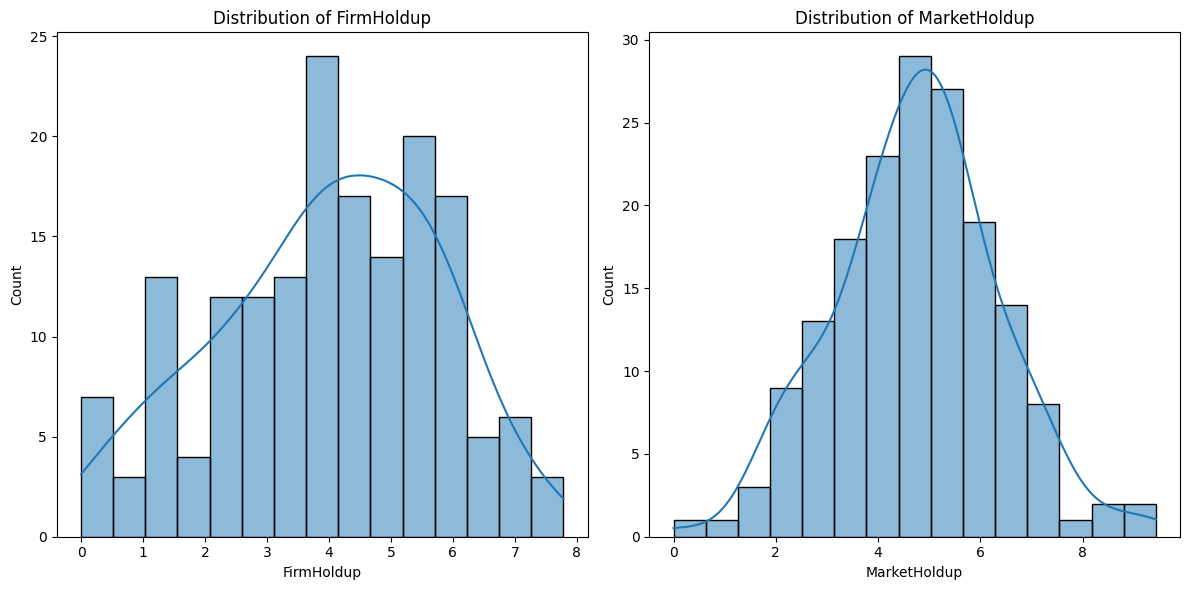

In [117]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_filtered['FirmHoldup'], kde=True, bins=15)
plt.title('Distribution of FirmHoldup')

plt.subplot(1, 2, 2)
sns.histplot(data_filtered['MarketHoldup'], kde=True, bins=15)
plt.title('Distribution of MarketHoldup')

plt.tight_layout()
plt.show()

Plotting Distribution of other metrics

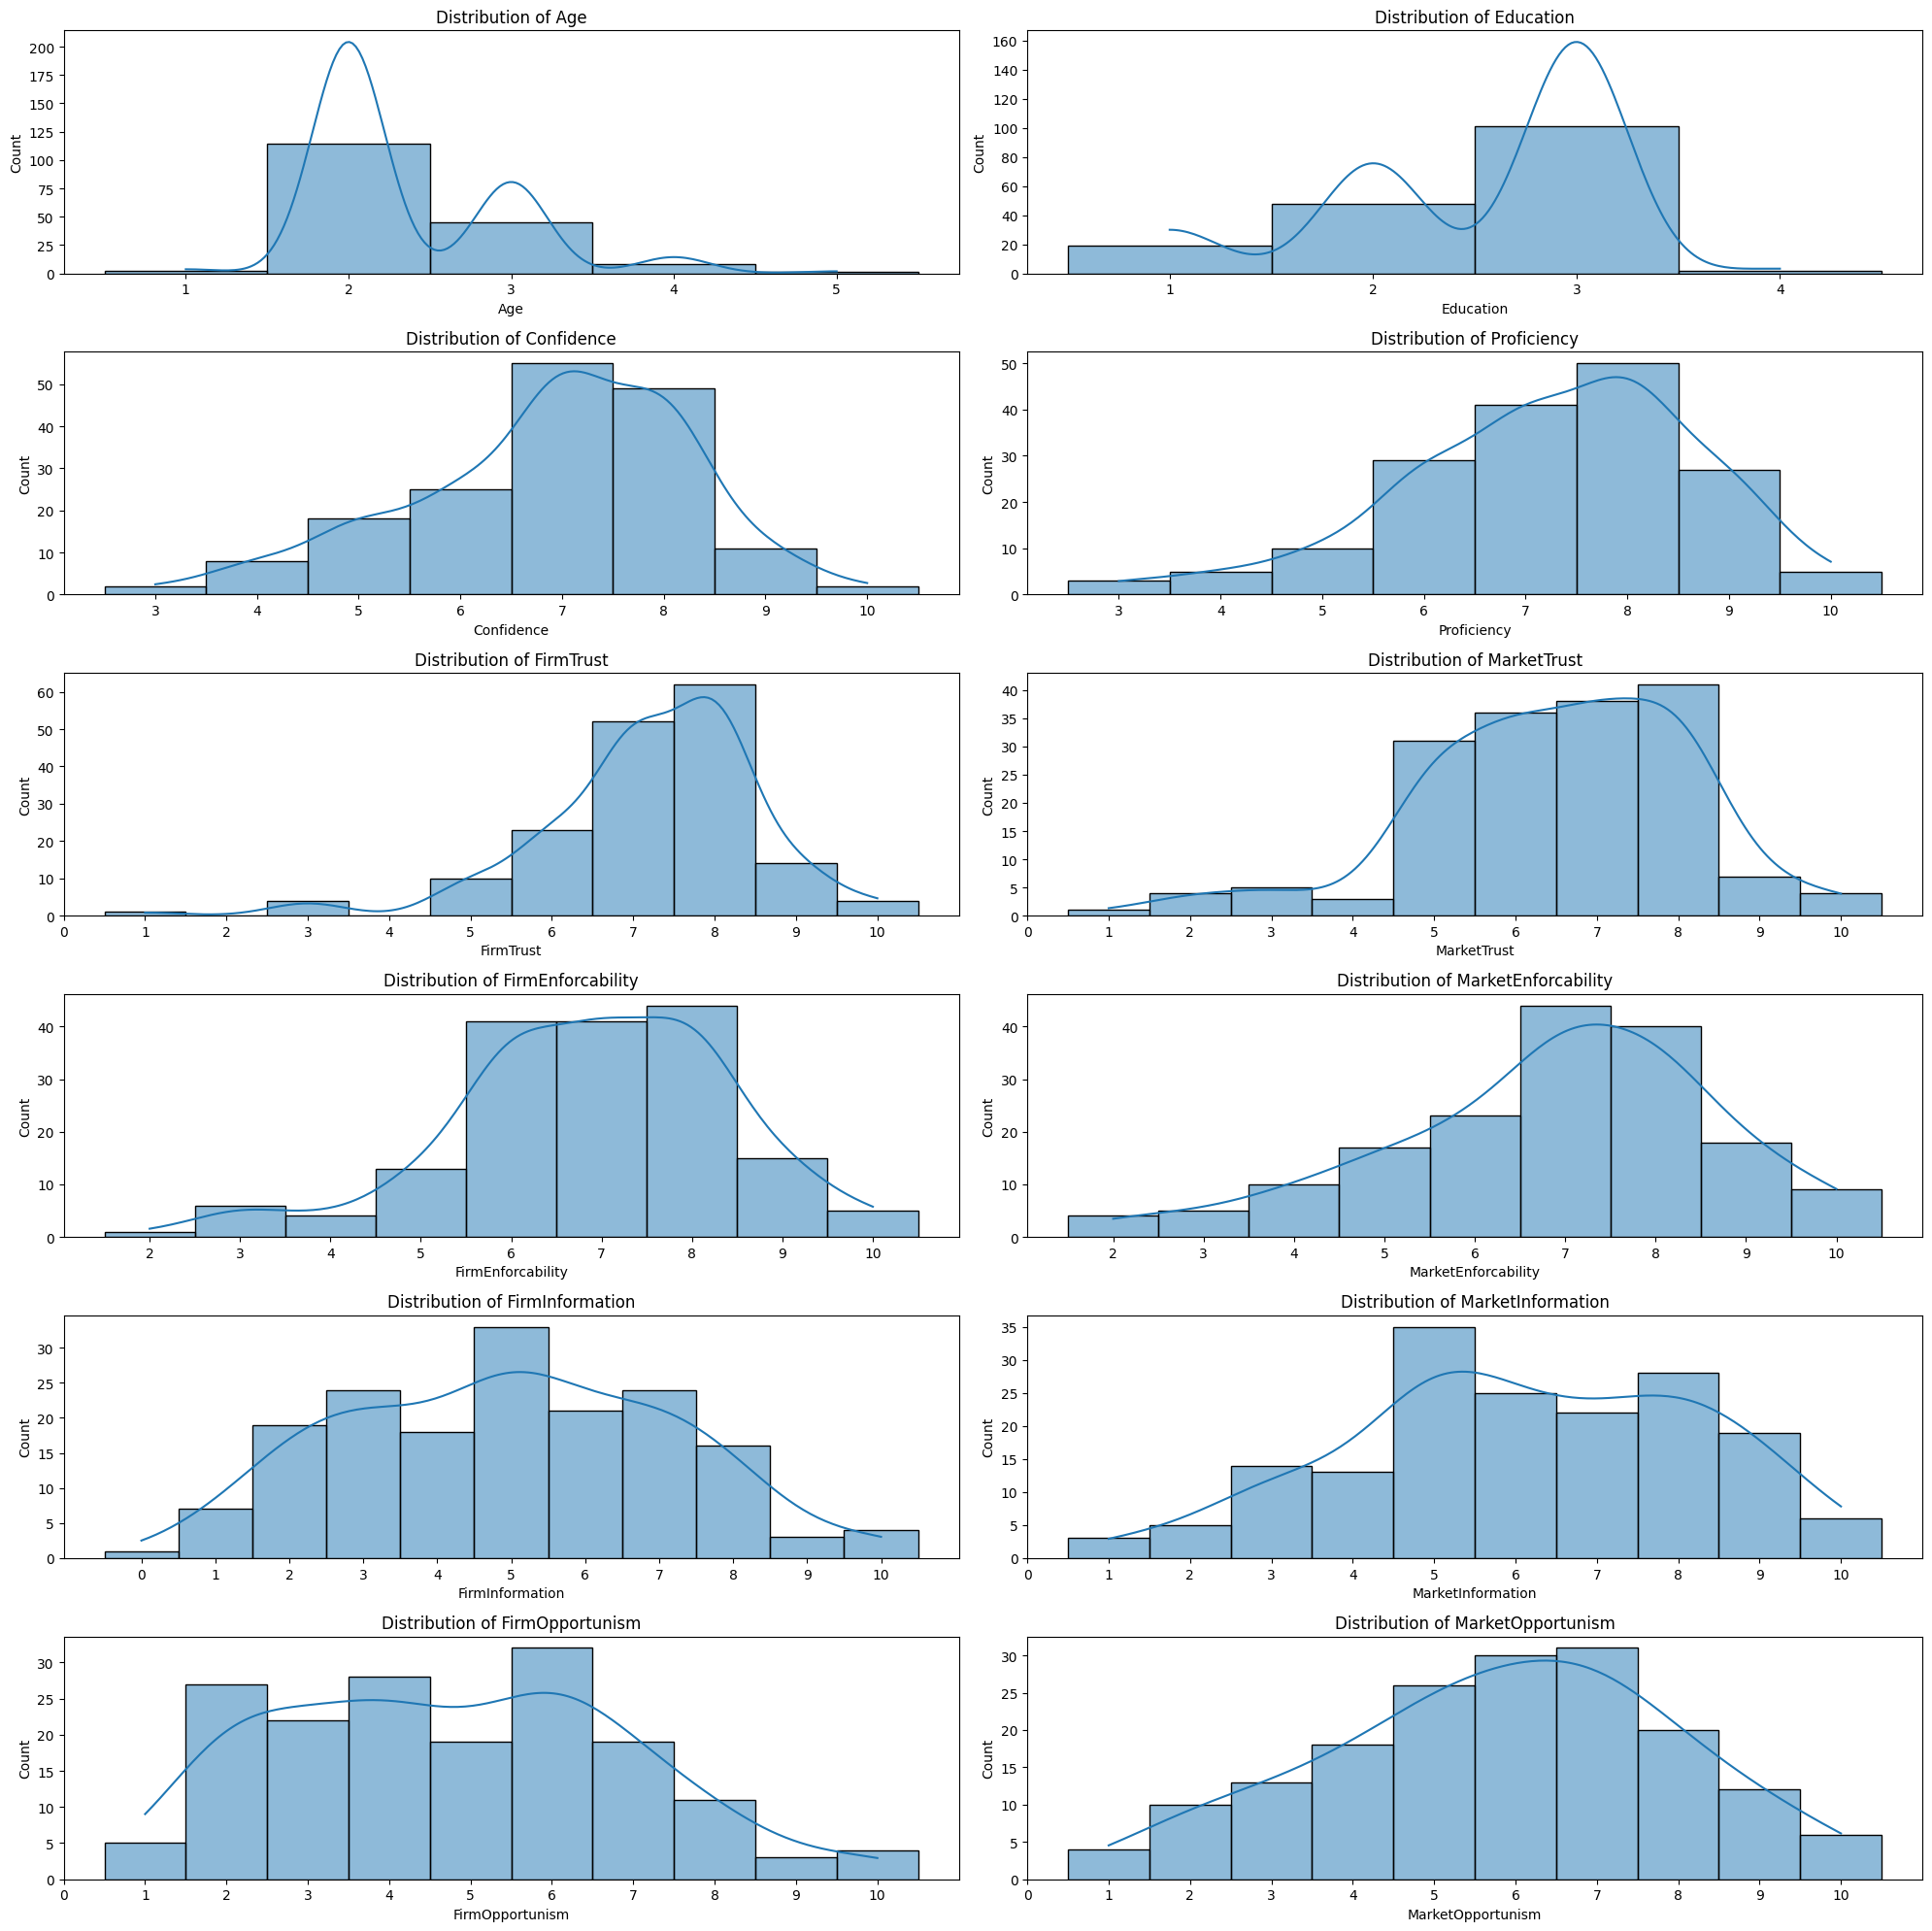

In [118]:
categorical_column_pairs = [
    ('Age', 'Education'),
    ('Confidence', 'Proficiency'),
    ('FirmTrust', 'MarketTrust'),
    ('FirmEnforcability', 'MarketEnforcability'),
    ('FirmInformation', 'MarketInformation'),
    ('FirmOpportunism', 'MarketOpportunism')
]

plt.figure(figsize=(20, 20))  
num_cols = 2  
num_rows = len(categorical_column_pairs) 

for idx, (col1, col2) in enumerate(categorical_column_pairs):
    plt.subplot(num_rows, num_cols, idx * 2 + 1)
    sns.histplot(data_filtered[col1], kde=True, bins=15)
    plt.title(f'Distribution of {col1}')
    plt.xlabel(col1)
    plt.ylabel('Count')

    plt.subplot(num_rows, num_cols, idx * 2 + 2)
    sns.histplot(data_filtered[col2], kde=True, bins=15)
    plt.title(f'Distribution of {col2}')
    plt.xlabel(col2)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


Running Correlation Analysis


Spearman's rank correlation matrix:
                           Age  Education  Confidence  Proficiency  \
Age                  1.000000   0.278891   -0.060500    -0.018414   
Education            0.278891   1.000000   -0.010385     0.075380   
Confidence          -0.060500  -0.010385    1.000000     0.408174   
Proficiency         -0.018414   0.075380    0.408174     1.000000   
SmartContract        0.097949   0.005894    0.001983     0.033465   
FirmTrust           -0.089512  -0.079949    0.218475     0.137837   
FirmEnforcability   -0.030065  -0.003899    0.095697     0.097988   
FirmInformation     -0.006834  -0.099912   -0.086803    -0.105562   
FirmOpportunism      0.006209  -0.102865   -0.027650    -0.062153   
MarketTrust          0.096897  -0.035820    0.235256     0.290904   
MarketEnforcability  0.164078   0.054698    0.085678     0.164159   
MarketInformation   -0.071892   0.104358   -0.065734    -0.100289   
MarketOpportunism    0.030179   0.089306   -0.046745    -0.093393

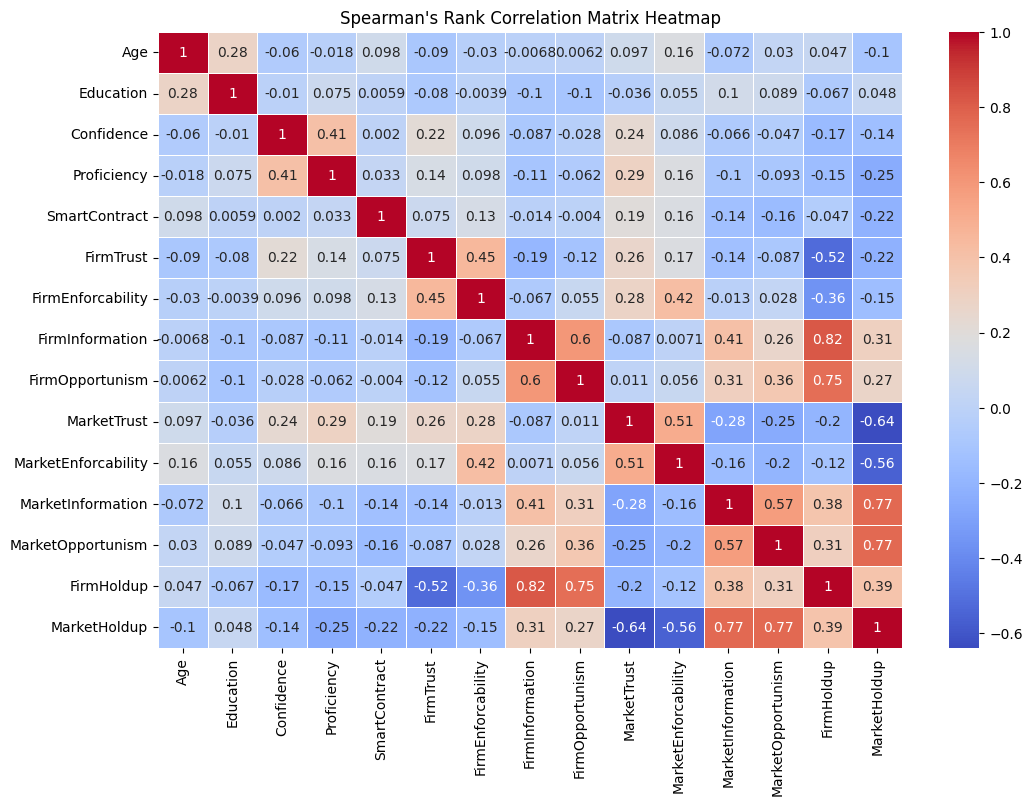

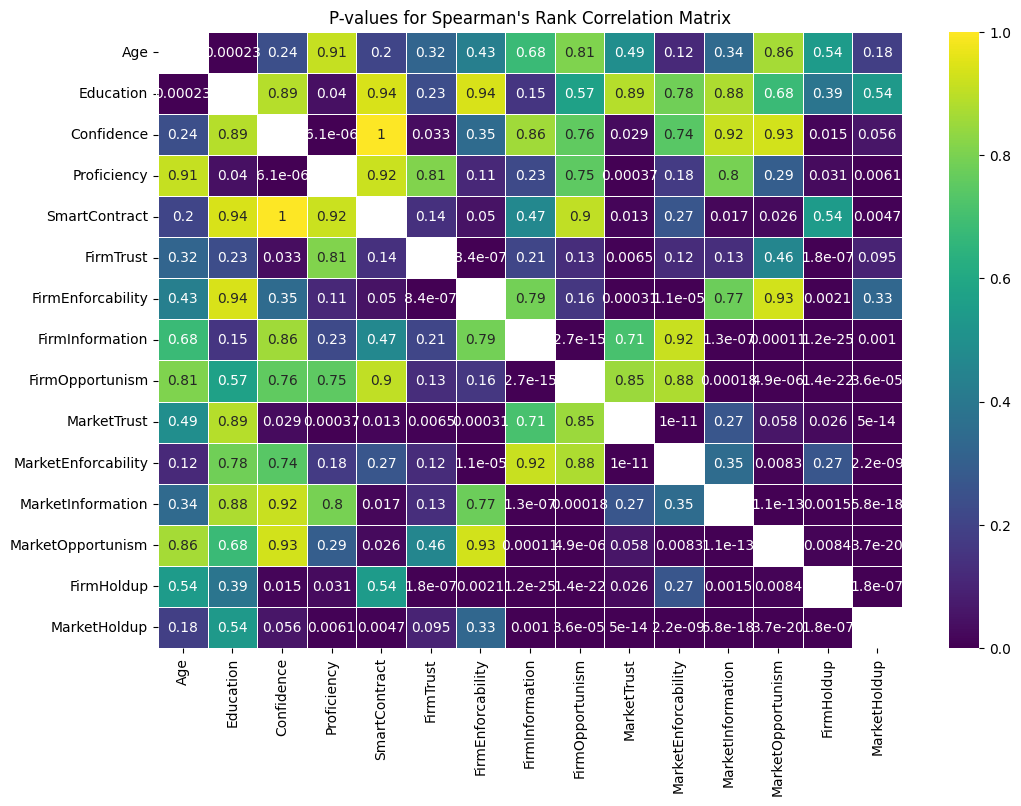

In [119]:
def spearman_corr_pvals(df):
    corr_matrix = df.corr(method='spearman')
    pval_matrix = pd.DataFrame(np.zeros_like(corr_matrix), columns=df.columns, index=df.columns)
    for row in df.columns:
        for col in df.columns:
            if row == col:
                pval_matrix.loc[row, col] = np.nan  
            else:
                corr, pval = spearmanr(df[row], df[col])
                pval_matrix.loc[row, col] = pval
    return corr_matrix, pval_matrix

spearman_corr, spearman_pvals = spearman_corr_pvals(data_filtered)

print("\nSpearman's rank correlation matrix:\n", spearman_corr)

print("\nP-values matrix:\n", spearman_pvals)

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Spearman's Rank Correlation Matrix Heatmap")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_pvals, annot=True, cmap='viridis', linewidths=0.5)
plt.title("P-values for Spearman's Rank Correlation Matrix")
plt.show()



Running Factor Analysis and Cronbach's Alpha

In [120]:
firm_data = data_filtered[['FirmTrust', 'FirmEnforcability', 'FirmInformation', 'FirmOpportunism']]
market_data = data_filtered[['MarketTrust', 'MarketEnforcability', 'MarketInformation', 'MarketOpportunism']]

firm_corr = firm_data.corr(method='spearman')

market_corr = market_data.corr(method='spearman')

fa_firm = FactorAnalyzer(n_factors=1, rotation=None)
fa_firm.fit(firm_corr)

fa_market = FactorAnalyzer(n_factors=1, rotation=None)
fa_market.fit(market_corr)

eigenvalues_firm, vectors_firm = fa_firm.get_eigenvalues()
loadings_firm = fa_firm.loadings_

eigenvalues_market, vectors_market = fa_market.get_eigenvalues()
loadings_market = fa_market.loadings_

print(f"FirmHoldUp Eigenvalues: {eigenvalues_firm}")
print(f"FirmHoldUp Factor Loadings:\n{loadings_firm}")
print(f"MarketHoldUp Eigenvalues: {eigenvalues_market}")
print(f"MarketHoldUp Factor Loadings:\n{loadings_market}")


FirmHoldUp Eigenvalues: [3.40658449e+00 4.09944806e-01 1.83470703e-01 4.14883878e-17]
FirmHoldUp Factor Loadings:
[[-0.92025823]
 [-0.77559487]
 [ 0.97991129]
 [ 0.90650098]]
MarketHoldUp Eigenvalues: [ 3.60518936e+00  2.44331209e-01  1.50479434e-01 -5.77453969e-16]
MarketHoldUp Factor Loadings:
[[-0.94319595]
 [-0.89067682]
 [ 0.94323258]
 [ 0.95038994]]


OMMITTED: Running Manipulation Check for Constructs through Mann Whitney-U test

                     statistic   p-value
FirmTrust               3303.0  0.327435
FirmInformation         3662.0  0.857553
FirmEnforcability       3056.5  0.080217
FirmOpportunism         3621.0  0.959774
MarketTrust             2810.0  0.011423
MarketEnforcability     2962.5  0.041564
MarketInformation       4172.5  0.073538
MarketOpportunism       4284.5  0.032318


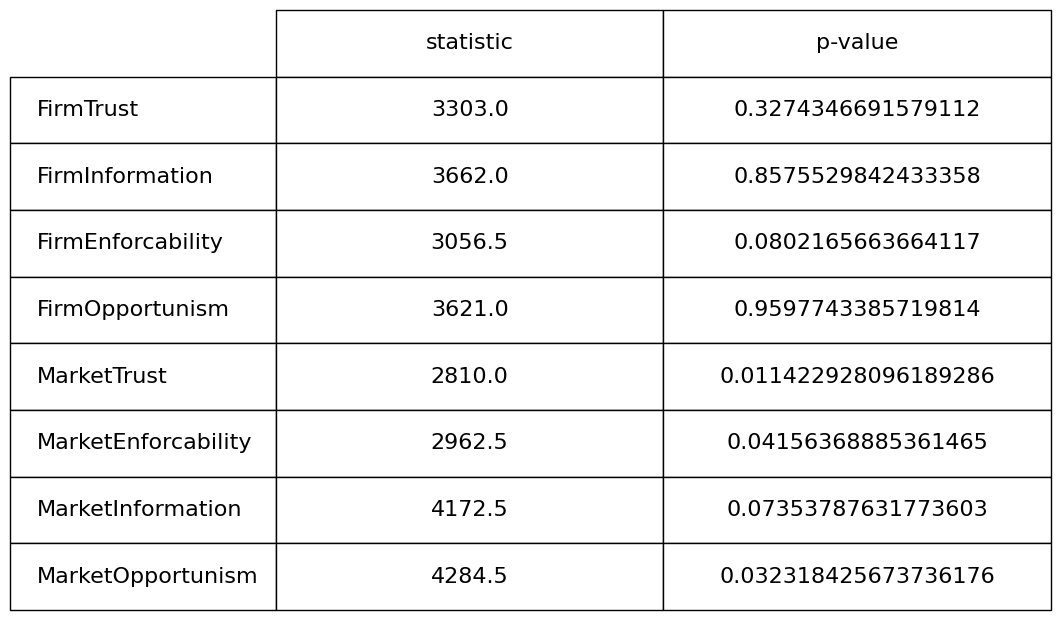

Data types:
 Age                    category
Education              category
Confidence             category
Proficiency            category
SmartContract             int32
FirmTrust              category
FirmEnforcability      category
FirmInformation        category
FirmOpportunism        category
MarketTrust            category
MarketEnforcability    category
MarketInformation      category
MarketOpportunism      category
FirmHoldup              float64
MarketHoldup            float64
dtype: object


In [121]:

ordinal_columns = [
    'FirmTrust', 'FirmInformation', 'FirmEnforcability', 'FirmOpportunism',
    'MarketTrust', 'MarketEnforcability', 'MarketInformation', 'MarketOpportunism'
]

for col in ordinal_columns:
    data_filtered[col] = pd.Categorical(data_filtered[col], ordered=True)

manipulation_check_vars = ordinal_columns

results = {}
for var in manipulation_check_vars:
    control_group = data_filtered[data_filtered['SmartContract'] == 0][var].cat.codes
    treatment_group = data_filtered[data_filtered['SmartContract'] == 1][var].cat.codes
    
    stat, p = mannwhitneyu(control_group, treatment_group)
    results[var] = {'statistic': stat, 'p-value': p}

results_df = pd.DataFrame(results).T

print(results_df)

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, rowLabels=results_df.index, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(16)
table.scale(1, 4)

plt.show()

print("Data types:\n", data_filtered.dtypes)


Running independent samples t-test for the composite DVs

T-Test Results:
               t-statistic   p-value
FirmHoldup       0.558205  0.577472
MarketHoldup     2.966022  0.003463

Levene's Test for Homogeneity of Variances:
               Levene Statistic   p-value
FirmHoldup            0.933980  0.335220
MarketHoldup          0.092174  0.761808


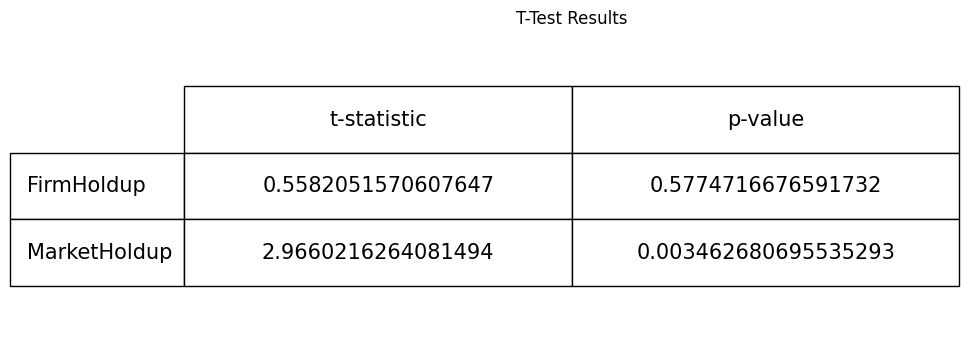

In [122]:
composite_scores = ['FirmHoldup', 'MarketHoldup']

composite_ttest_results = {}
levene_results = {}

for var in composite_scores:
    control_group = data_filtered[data_filtered['SmartContract'] == 0][var]
    treatment_group = data_filtered[data_filtered['SmartContract'] == 1][var]
    
    stat, p = ttest_ind(control_group, treatment_group, equal_var=False)
    composite_ttest_results[var] = {'t-statistic': stat, 'p-value': p}
    
    levene_stat, levene_p = levene(control_group, treatment_group)
    levene_results[var] = {'Levene Statistic': levene_stat, 'p-value': levene_p}

composite_ttest_results_df = pd.DataFrame(composite_ttest_results).T
levene_results_df = pd.DataFrame(levene_results).T

print("T-Test Results:\n", composite_ttest_results_df)

print("\nLevene's Test for Homogeneity of Variances:\n", levene_results_df)

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=composite_ttest_results_df.values, colLabels=composite_ttest_results_df.columns, rowLabels=composite_ttest_results_df.index, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(1, 4)
plt.title("T-Test Results")
plt.show()

Running Multicollinearity check

         feature        VIF
0          const  61.903998
1  SmartContract   1.012366
2            Age   1.061091
3      Education   1.055294
4     Confidence   1.189530
5    Proficiency   1.191725


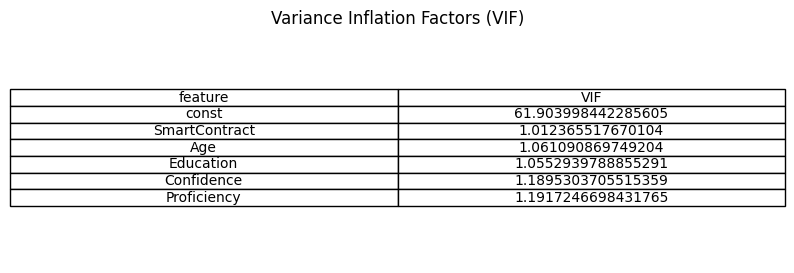

In [123]:
data_filtered['Age'] = data_filtered['Age'].astype('category').cat.codes
data_filtered['Education'] = data_filtered['Education'].astype('category').cat.codes
data_filtered['Confidence'] = data_filtered['Confidence'].astype('category').cat.codes
data_filtered['Proficiency'] = data_filtered['Proficiency'].astype('category').cat.codes

X = data_filtered[['SmartContract', 'Age', 'Education', 'Confidence', 'Proficiency' 
                  ]]
X = sm.add_constant(X)

X = X.dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

fig, ax = plt.subplots(figsize=(10, 3))  
ax.axis('tight') 
ax.axis('off')   
table = ax.table(cellText=vif_data.values,  
                 colLabels=vif_data.columns, 
                 loc='center', 
                 cellLoc='center')

plt.title("Variance Inflation Factors (VIF)") 
plt.show()




Ensuring control variables are treated as Ordinal data for regression

In [124]:
data_filtered['Age'] = data_filtered['Age'].astype('category')
data_filtered['Education'] = data_filtered['Education'].astype('category')
data_filtered['Confidence'] = data_filtered['Confidence'].astype('category')
data_filtered['Proficiency'] = data_filtered['Proficiency'].astype('category')


print("Data types:\n", data_filtered.dtypes)
print("\nNumber of rows: ", data_filtered.shape[0])

Data types:
 Age                    category
Education              category
Confidence             category
Proficiency            category
SmartContract             int32
FirmTrust              category
FirmEnforcability      category
FirmInformation        category
FirmOpportunism        category
MarketTrust            category
MarketEnforcability    category
MarketInformation      category
MarketOpportunism      category
FirmHoldup              float64
MarketHoldup            float64
dtype: object

Number of rows:  170


 Fitting the regression model for FirmHoldup and testing for assumptions and conducting robustness checks and sensitivity analysis

                            OLS Regression Results                            
Dep. Variable:             FirmHoldup   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.703
Date:                Sun, 16 Jun 2024   Prob (F-statistic):              0.137
Time:                        21:12:02   Log-Likelihood:                -334.36
No. Observations:                 170   AIC:                             680.7
Df Residuals:                     164   BIC:                             699.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.9999      1.063      5.646

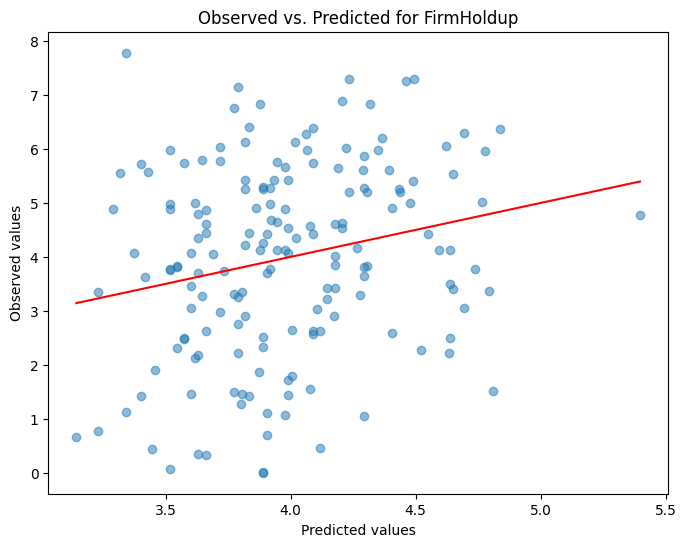

Durbin-Watson statistic for FirmHoldup: 1.9267316464259567


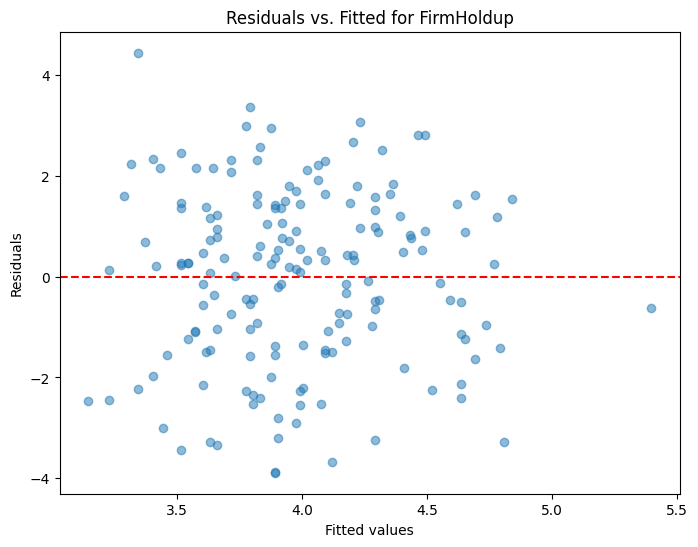

{'Lagrange multiplier statistic': 4.0982795892096915, 'p-value': 0.5353547085641884, 'f-value': 0.8102602564532249, 'f p-value': 0.5438904082905125}
       variables        VIF
0          const  61.903998
1  SmartContract   1.012366
2            Age   1.061091
3      Education   1.055294
4     Confidence   1.189530
5    Proficiency   1.191725


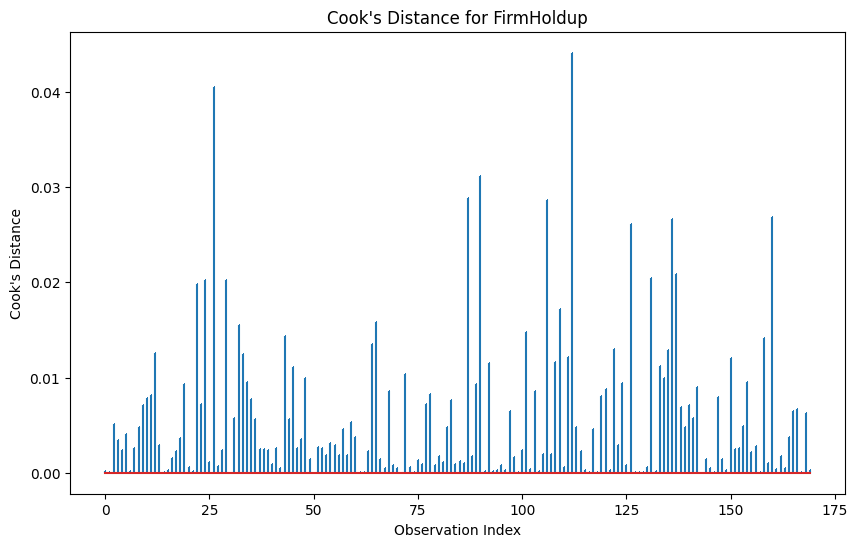

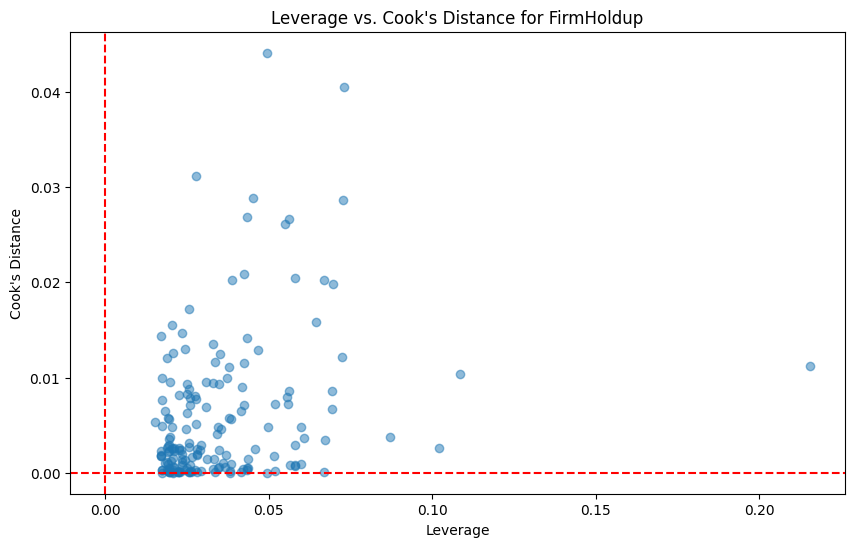

Bootstrap Mean for SmartContract: -0.18210453728811635
Bootstrap Standard Deviation for SmartContract: 0.2615439883718933


In [125]:
y_firm = data_filtered['FirmHoldup']

X = data_filtered[['SmartContract', 'Age', 'Education', 'Confidence', 'Proficiency', 
                   ]]

X = sm.add_constant(X)

model_firm = sm.OLS(y_firm, X).fit()

print(model_firm.summary())

# This is the code I used to test for Linearity
plt.figure(figsize=(8, 6))
plt.scatter(model_firm.fittedvalues, y_firm, alpha=0.5)
plt.plot([min(model_firm.fittedvalues), max(model_firm.fittedvalues)], [min(model_firm.fittedvalues), max(model_firm.fittedvalues)], color='red')
plt.xlabel('Predicted values')
plt.ylabel('Observed values')
plt.title('Observed vs. Predicted for FirmHoldup')
plt.show()

# This is the code I used to test for the Independence of errors
dw_firm = durbin_watson(model_firm.resid)
print(f'Durbin-Watson statistic for FirmHoldup: {dw_firm}')

# This is the code I used to test for Homoscedasticity
plt.figure(figsize=(8, 6))
plt.scatter(model_firm.fittedvalues, model_firm.resid, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted for FirmHoldup')
plt.show()

bp_test_firm = het_breuschpagan(model_firm.resid, model_firm.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test_firm)))

# Here we check for Multicollinearity check using VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

# This is to plot the Cook's distance
influence_firm = model_firm.get_influence()
(cook_firm, pvals) = influence_firm.cooks_distance

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cook_firm)), cook_firm, markerfmt=",")
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance for FirmHoldup')
plt.show()

# This is to plot the Leverage Values versus the Cook's Distance
leverage_firm = influence_firm.hat_matrix_diag
plt.figure(figsize=(10, 6))
plt.scatter(leverage_firm, cook_firm, alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel('Cook\'s Distance')
plt.title('Leverage vs. Cook\'s Distance for FirmHoldup')
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')
plt.show()

# This is the code for the Sensitivity analysis using bootstrap
n_iterations = 1000
bootstrap_coefficients = []

for i in range(n_iterations):
    sample = data_filtered.sample(n=len(data_filtered), replace=True)
    X_boot = sample[['SmartContract', 'Age', 'Education', 'Confidence', 'Proficiency']]
    y_boot = sample['FirmHoldup']
    X_boot = sm.add_constant(X_boot)
    model_boot = sm.OLS(y_boot, X_boot).fit()
    bootstrap_coefficients.append(model_boot.params['SmartContract'])

bootstrap_coefficients = np.array(bootstrap_coefficients)
bootstrap_mean = np.mean(bootstrap_coefficients)
bootstrap_std = np.std(bootstrap_coefficients)

print(f"Bootstrap Mean for SmartContract: {bootstrap_mean}")
print(f"Bootstrap Standard Deviation for SmartContract: {bootstrap_std}")


Fitting the regression model for MarketHoldup and testing for assumptions and conducting robustness checks and sensitivity analysis

                            OLS Regression Results                            
Dep. Variable:           MarketHoldup   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     3.428
Date:                Sun, 16 Jun 2024   Prob (F-statistic):            0.00567
Time:                        21:12:06   Log-Likelihood:                -311.26
No. Observations:                 170   AIC:                             634.5
Df Residuals:                     164   BIC:                             653.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.8650      0.928      7.400

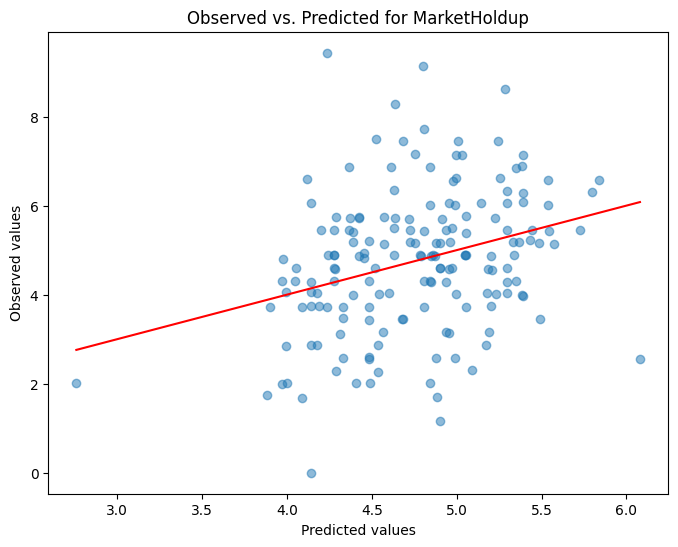

Durbin-Watson statistic for MarketHoldup: 1.8259817884871414


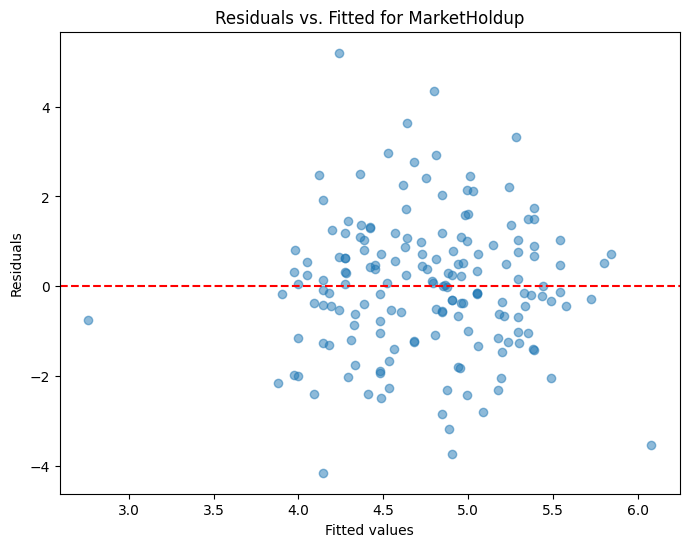

{'Lagrange multiplier statistic': 3.0787186704814964, 'p-value': 0.6878510271055998, 'f-value': 0.6049676325719376, 'f p-value': 0.6961996918313393}
       variables        VIF
0          const  61.903998
1  SmartContract   1.012366
2            Age   1.061091
3      Education   1.055294
4     Confidence   1.189530
5    Proficiency   1.191725


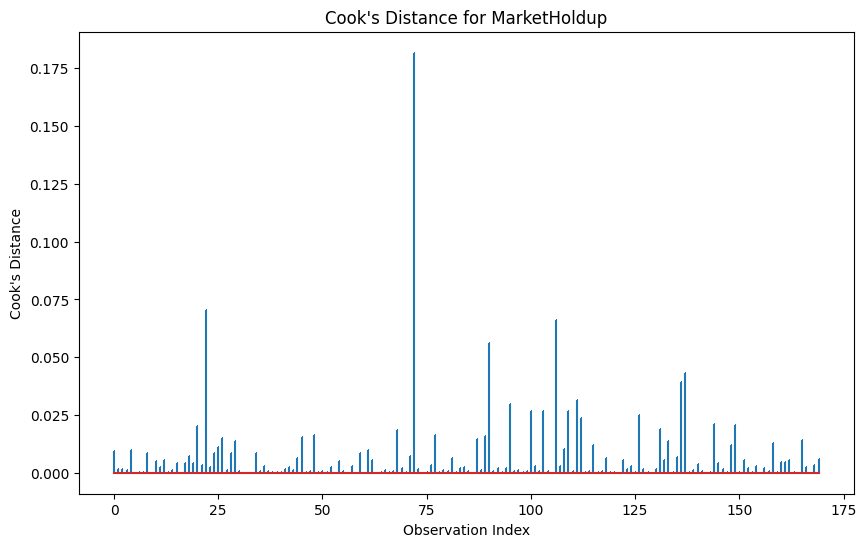

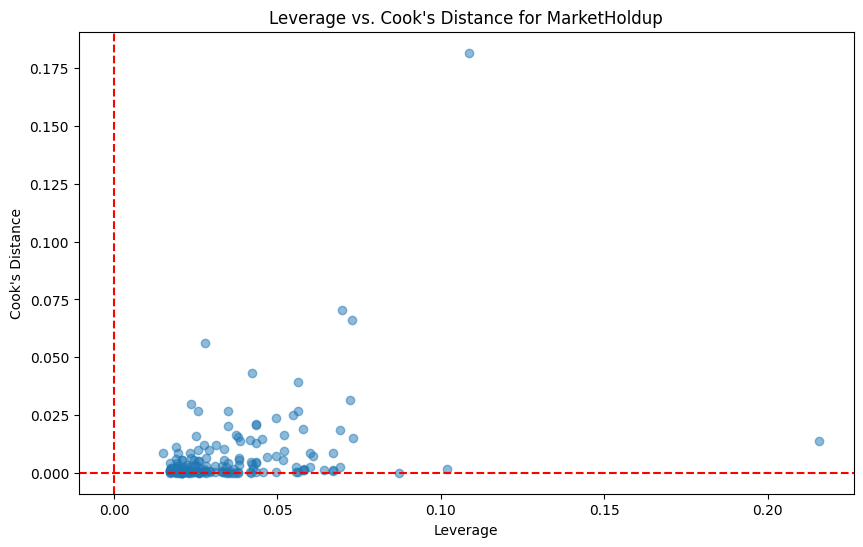

Bootstrap Mean for SmartContract: -0.6557658938988725
Bootstrap Standard Deviation for SmartContract: 0.2362454912358617


In [126]:
y_market = data_filtered['MarketHoldup']

X = data_filtered[['SmartContract', 'Age', 'Education', 'Confidence', 'Proficiency' 
                   ]]

X = sm.add_constant(X)

model_market = sm.OLS(y_market, X).fit()

print(model_market.summary())

# This is the code I used to test for Linearity
plt.figure(figsize=(8, 6))
plt.scatter(model_market.fittedvalues, y_market, alpha=0.5)
plt.plot([min(model_market.fittedvalues), max(model_market.fittedvalues)], [min(model_market.fittedvalues), max(model_market.fittedvalues)], color='red')
plt.xlabel('Predicted values')
plt.ylabel('Observed values')
plt.title('Observed vs. Predicted for MarketHoldup')
plt.show()

# This is the code I used to test for the Independence of errors
dw_market = durbin_watson(model_market.resid)
print(f'Durbin-Watson statistic for MarketHoldup: {dw_market}')

# This is the code I used to test for Homoscedasticity
plt.figure(figsize=(8, 6))
plt.scatter(model_market.fittedvalues, model_market.resid, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted for MarketHoldup')
plt.show()

bp_test_market = het_breuschpagan(model_market.resid, model_market.model.exog)
print(dict(zip(labels, bp_test_market)))

# Checking for Multicollinearity check using VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

# Plotting cook's distance
influence_market = model_market.get_influence()
(cook_market, pvals) = influence_market.cooks_distance

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cook_market)), cook_market, markerfmt=",")
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance for MarketHoldup')
plt.show()

# Here we plot the Leverage Values against the Cook's Distance
leverage_market = influence_market.hat_matrix_diag
plt.figure(figsize=(10, 6))
plt.scatter(leverage_market, cook_market, alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel('Cook\'s Distance')
plt.title('Leverage vs. Cook\'s Distance for MarketHoldup')
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')
plt.show()

# This is the code for running the Sensitivity analysis using bootstrap
n_iterations = 1000
bootstrap_coefficients = []

for i in range(n_iterations):
    sample = data_filtered.sample(n=len(data_filtered), replace=True)
    X_boot = sample[['SmartContract', 'Age', 'Education', 'Confidence', 'Proficiency']]
    y_boot = sample['MarketHoldup']
    X_boot = sm.add_constant(X_boot)
    model_boot = sm.OLS(y_boot, X_boot).fit()
    bootstrap_coefficients.append(model_boot.params['SmartContract'])

bootstrap_coefficients = np.array(bootstrap_coefficients)
bootstrap_mean = np.mean(bootstrap_coefficients)
bootstrap_std = np.std(bootstrap_coefficients)


print(f"Bootstrap Mean for SmartContract: {bootstrap_mean}")
print(f"Bootstrap Standard Deviation for SmartContract: {bootstrap_std}")



Addtional assumption checking involving the Standardisation and subsequent plotting of the residuals of both DVs (I put this after the other assumptions as those are tested using raw residuals and here we standardise them seperately)

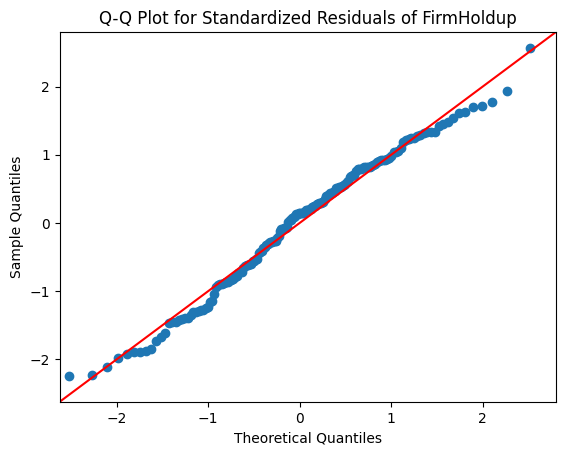

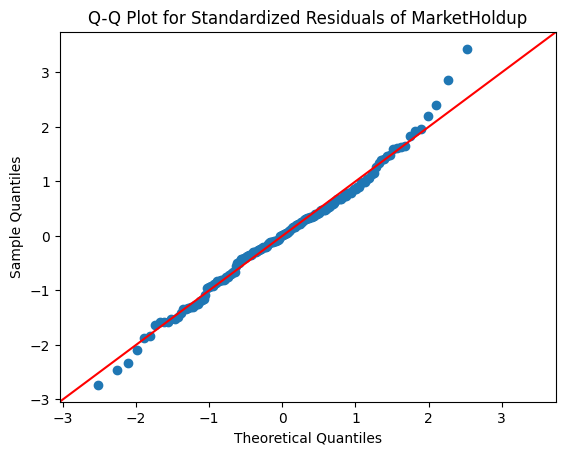

In [127]:
residuals_firm = model_firm.resid
residuals_market = model_market.resid

standardized_residuals_firm = (residuals_firm - residuals_firm.mean()) / residuals_firm.std()
standardized_residuals_market = (residuals_market - residuals_market.mean()) / residuals_market.std()

sm.qqplot(standardized_residuals_firm, line='45')
plt.title('Q-Q Plot for Standardized Residuals of FirmHoldup')
plt.show()

sm.qqplot(standardized_residuals_market, line='45')
plt.title('Q-Q Plot for Standardized Residuals of MarketHoldup')
plt.show()